<a href="https://colab.research.google.com/github/therealmolf/Machine-Learning/blob/master/MLP_for_MultiClass_Classification_on_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# when loading mnist or fashion using keras and not sklearn
# image is rep. as 28x28 array rather than 1D array of 784, pixels are ints and not floats too

# dataset has already been split into train and test, but no validation set yet

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag",
               "Ankle Boot" ]

# class_names[y_train[4]]

# lets build a neural network using Keras
# simplest keras model is sequential

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# 1 passthrough layer for the input conversion, 2 hidden layers w 300 and 100 neurons respectively
# 1 output layer with softmax activation for multiclass classification (10 fashion items)

# a dense layer manages its own weight matrix (kernel) and vector of bias terms  one per neuron


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# after the model is created, call compile() method to specify loss n optimizer

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
# we are using sparse categorical because classes are exclusive

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
# fit returns History object


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 10s 185us/sample - loss: 0.7222 - acc: 0.7612 - val_loss: 0.4995 - val_acc: 0.8360
Epoch 2/30
55000/55000 [==============================] - 9s 171us/sample - loss: 0.4893 - acc: 0.8301 - val_loss: 0.4611 - val_acc: 0.8370
Epoch 3/30
55000/55000 [==============================] - 9s 170us/sample - loss: 0.4439 - acc: 0.8441 - val_loss: 0.4232 - val_acc: 0.8588
Epoch 4/30
55000/55000 [==============================] - 12s 213us/sample - loss: 0.4179 - acc: 0.8533 - val_loss: 0.3954 - val_acc: 0.8648
Epoch 5/30
55000/55000 [==============================] - 18s 327us/sample - loss: 0.3988 - acc: 0.8599 - val_loss: 0.3878 - val_acc: 0.8620
Epoch 6/30
55000/55000 [==============================] - 10s 187us/sample - loss: 0.3825 - acc: 0.8661 - val_loss: 0.3740 - val_acc: 0.8720
Epoch 7/30
55000/55000 [==============================] - 11s 204us/sample - loss: 0.3699 - acc: 0.8695 - v

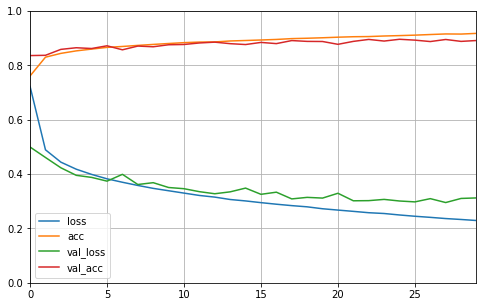

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()